1 Bajar los datos con columnas ['target','columna1', 'columna2', . . ., 'columnaN']
e.g. ['municipio','indicador uno','indicador dos', 'indicador 20']:

ldurazo: elegí los datos provenientes de https://www.kaggle.com/shishir349/can-pizza-be-healthy

In [253]:
import pandas as pd
data = '../data/dataset.csv'
df = pd.read_csv(data)

2 Se definen las ‘features' (las columnas del dataframe data a las que les vamos
aplicar el PCA):

In [254]:
features = ['mois','prot','fat','ash','sodium','carb']

3 Se separan las características:

In [255]:
x = df.loc[:, features].values

Se separan el target:

In [256]:
y = df.loc[:,['cal']].values

5 Se estandarizan las características:

In [257]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
print(x)

[[-1.37181459  1.25418127  2.74984143  1.9538938   2.97668662 -1.22751105]
 [-1.30156227  1.22771661  2.64047481  2.13533826  3.03077869 -1.21362189]
 [-1.31624186  1.03000998  2.85139615  1.93022714  2.59804213 -1.22584435]
 ...
 [ 0.3823963  -0.36794707 -0.46866201 -0.16032853 -0.07951534  0.1730719 ]
 [ 0.70220164 -0.45823828 -0.56352082 -0.24710631 -0.29588362  0.08918137]
 [ 0.62251244 -0.53918903 -0.52780927 -0.28655076 -0.26883759  0.14529358]]


¿Qué efecto hace la función StandardScaler a x? ¿Podrías explicarlo en términos de lo
visto en álgebra lineal y estadístico?

ldurazo: transforma cada valor, quitándole la media y dividiéndo entre la desviación estándar. de modo que la media es cero
y la desviación es 1. Esto parece darle una forma uniforme a los datos para un mejor análisis

7 Dejemos que sklearn haga su trabajo, por ejemplo pidiéndole 2 componentes:

In [258]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

print(principalComponents)

[[ 4.23267051e+00  2.68264146e+00  6.86621441e-02  7.74828419e-02
  -2.80780162e-01 -9.97041295e-04]
 [ 4.29100731e+00  2.61821292e+00  2.31636970e-02  2.76975821e-01
  -2.15849439e-01 -9.66934742e-04]
 [ 4.02144555e+00  2.59015172e+00  9.01403363e-03 -1.39516825e-01
   4.13562125e-02 -7.51269404e-04]
 ...
 [-4.84872119e-01 -3.69913596e-01 -3.61959554e-01  2.40668266e-01
  -4.86298700e-02 -1.95049037e-04]
 [-6.07431043e-01 -7.30595184e-01 -5.04923504e-01  1.38152438e-01
   2.02852663e-02 -1.27135788e-04]
 [-6.72264303e-01 -6.11734653e-01 -5.38407794e-01  1.25606540e-01
   2.24906024e-02 -1.31791790e-04]]


¿Cuál es el máximo de componentes principales que puedo pedir?

ldurazo: aparentemente, tantas características haya elegido, siempre y cuando los componentes que elija sea menor
al número de características o al número de eventos siempre y cuando el número de eventos sea menor al número de características
de lo contrario, el máximo siempre es el número de características.

8 Fácilmente se puede formar el DataFrame de componentes principales:

In [259]:
matrixComponents = pd.DataFrame(data = principalComponents, columns = ['mois','prot','fat','ash','sodium','carb'])

¿Cómo sé qué tantas componentes es pertinente tomar en cuenta para mis datos?

9 Usa los comandos explained_variance_ o explained_variance_ratio_ para
tomar una decisión informada. Por ejemplo, grafica número de componentes vs el
radio de la varianza explicada.

ldurazo: podemos ver, utilizando cumsum (suma acumulada del radio de la varianza explicada) que mis primeros dos componentes
son responsables del 91% de la varianza. mientras que con 3, tengo el 98%.

Estos 3 componentes principales, son los que debería elegir para mis datos.

In [260]:
print(pca.explained_variance_ratio_.cumsum())

[0.66634275 0.91413173 0.98166186 0.995442   0.9999984  1.        ]


10 Grafica las dos o tres primeras componentes principales.

ldurazo: aquí, es fácil observar la varianza explicada por componente

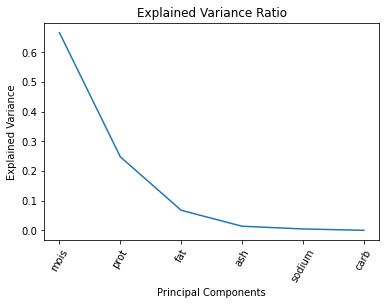

In [261]:
import matplotlib.pyplot as plt

plt.plot(range(0,6), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(range(0,6),
           ['mois','prot','fat','ash','sodium','carb'], rotation=60)
plt.title('Explained Variance Ratio')
plt.show()